# covid 19 Clustering.

In [1]:
#CLUSTERING AND PCA ON COVID DATE GOPIKRISHNAN C P ROLL NO 20
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('covid_19_india.csv')
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       9291 non-null   int64 
 1   Date                      9291 non-null   object
 2   Time                      9291 non-null   object
 3   State/UnionTerritory      9291 non-null   object
 4   ConfirmedIndianNational   9291 non-null   object
 5   ConfirmedForeignNational  9291 non-null   object
 6   Cured                     9291 non-null   int64 
 7   Deaths                    9291 non-null   int64 
 8   Confirmed                 9291 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 653.4+ KB


In [4]:

df['Date1'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

In [5]:
df=pd.DataFrame(df.groupby("Date1")['Confirmed'].sum())
df.reset_index(inplace=True)


In [6]:
df['Year'] = df['Date1'].dt.year
df['Month'] = df['Date1'].dt.month
df['Day'] = df['Date1'].dt.day
df['Week'] = df['Date1'].dt.week
df.head()

<ipython-input-6-528cb04bd4b6>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Date1'].dt.week


,Date1,Confirmed,Year,Month,Day,Week
0,2020-01-30,1,2020,1,30,5
1,2020-01-31,1,2020,1,31,5
2,2020-02-01,2,2020,2,1,5
3,2020-02-02,3,2020,2,2,5
4,2020-02-03,3,2020,2,3,6


In [7]:

df['Weekofyear'] = df['Date1'].dt.weekofyear
df['Dayofweek'] = df['Date1'].dt.dayofweek
df['Weekday'] = df['Date1'].dt.weekday
df['Dayofyear'] = df['Date1'].dt.dayofyear
df['Quarter'] = df['Date1'].dt.quarter
df.head()


<ipython-input-7-9301a0ac4ae7>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Weekofyear'] = df['Date1'].dt.weekofyear


,Date1,Confirmed,Year,Month,Day,Week,Weekofyear,Dayofweek,Weekday,Dayofyear,Quarter
0,2020-01-30,1,2020,1,30,5,5,3,3,30,1
1,2020-01-31,1,2020,1,31,5,5,4,4,31,1
2,2020-02-01,2,2020,2,1,5,5,5,5,32,1
3,2020-02-02,3,2020,2,2,5,5,6,6,33,1
4,2020-02-03,3,2020,2,3,6,6,0,0,34,1


In [10]:
df.corr()

,Confirmed,Year,Month,Day,Week,Weekofyear,Dayofweek,Weekday,Dayofyear,Quarter
Confirmed,1.000000,NaN,0.900148,0.000370,0.903275,0.903275,-0.009023,-0.009023,0.903513,0.868656
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,0.900148,NaN,1.000000,-0.072999,0.994990,0.994990,-0.011690,-0.011690,0.995214,0.968102
Day,0.000370,NaN,-0.072999,1.000000,0.024504,0.024504,0.007488,0.007488,0.024681,-0.053772
Week,0.903275,NaN,0.994990,0.024504,1.000000,1.000000,-0.032976,-0.032976,0.999758,0.964564
Weekofyear,0.903275,NaN,0.994990,0.024504,1.000000,1.000000,-0.032976,-0.032976,0.999758,0.964564
Dayofweek,-0.009023,NaN,-0.011690,0.007488,-0.032976,-0.032976,1.000000,1.000000,-0.010997,-0.003046
Weekday,-0.009023,NaN,-0.011690,0.007488,-0.032976,-0.032976,1.000000,1.000000,-0.010997,-0.003046
Dayofyear,0.903513,NaN,0.995214,0.024681,0.999758,0.999758,-0.010997,-0.010997,1.000000,0.964964
Quarter,0.868656,NaN,0.968102,-0.053772,0.964564,0.964564,-0.003046,-0.003046,0.964964,1.000000


In [15]:

X = df.drop(['Date1','Confirmed',"Year"],axis=1)
y = df.Confirmed
x = df.Date1


In [16]:


x=list(x.index)


In [17]:
x=np.array(x).reshape(-1,1)


In [19]:
X = X.values

In [21]:
#test, train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)



In [22]:
#linear reg model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)


LinearRegression()

In [23]:

y_pred = lin_model.predict(X_train)


In [24]:
#rmsevalues

rmse = (np.sqrt(mean_squared_error(y_train, y_pred)))
print('RMSE is {}'.format(rmse))
print("\n")

y_pred = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print('RMSE is {}'.format(rmse))

RMSE is 1172244.7939495037


RMSE is 1343644.6111200617


# clustering unsupervised learning

In [26]:
from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters=5)
y_km5 = kmeans5.fit_predict(X_train)
print(y_km5)

[0 3 3 0 3 3 2 0 1 2 3 4 2 3 1 4 2 2 0 4 3 4 3 3 0 0 1 3 4 4 0 1 0 0 0 2 0
 1 1 1 0 2 3 0 4 2 0 4 1 2 4 1 2 2 4 1 0 0 4 2 4 0 2 0 2 3 0 1 0 0 4 3 4 4
 2 0 3 3 0 1 3 1 1 1 0 0 2 3 3 4 4 4 3 3 0 3 4 3 2 1 0 4 1 4 2 0 1 2 0 1 2
 4 1 3 0 1 3 4 1 2 1 1 3 0 4 1 0 3 4 0 3 3 1 2 0 2 3 3 1 2 3 2 0 4 4 4 2 4
 2 0 2 3 1 4 1 2 4 2 4 3 3 1 3 2 0 3 0 4 1 1 3 0 0 3 1 1 0 3 0 4 0 3 0 0 1
 4 0 1 1 1 1 4 2 2 3 3 3 1 0 2 2 4 2 3 4 4 1 0 3 0 4 1 3 0 1 4 0 0 1 1 4 0
 2 1 4 3 2 1 0 1 1 4 2 4 3 3 2 2 4 4 3 2 3 1 4 3 3 2 4 1 3 3]


In [27]:
kmeans5.cluster_centers_


array([[ 10.72222222,  15.51851852,  45.25925926,  45.25925926,
          2.96296296,   2.96296296, 311.77777778,   4.        ],
       [  6.37254902,  16.92156863,  26.45098039,  26.45098039,
          2.8627451 ,   2.8627451 , 180.01960784,   2.45098039],
       [  2.27906977,  13.6744186 ,   8.20930233,   8.20930233,
          3.20930233,   3.20930233,  52.6744186 ,   1.        ],
       [  8.65454545,  14.58181818,  36.10909091,  36.10909091,
          3.01818182,   3.01818182, 247.78181818,   3.09090909],
       [  4.2244898 ,  16.24489796,  17.        ,  17.        ,
          2.85714286,   2.85714286, 113.85714286,   1.87755102]])

In [28]:
clusters = list(np.arange(1,11))


In [30]:

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train)
    distortions.append(kmeanModel.inertia_)


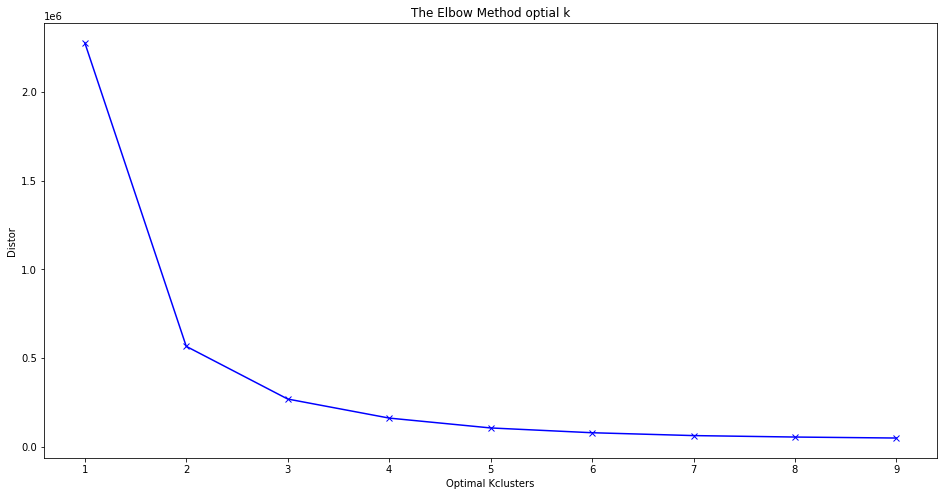

In [31]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Optimal Kclusters')
plt.ylabel('Distor')
plt.title('The Elbow Method optial k')
plt.show()


In [32]:
#cluster n=3
kmeans3 = KMeans(n_clusters=3)
y_km3 = kmeans3.fit_predict(X_train)
print(y_km3)


[1 0 1 1 0 1 2 1 0 2 1 2 2 0 0 0 2 2 1 2 1 2 0 1 1 1 0 1 2 2 1 0 1 1 1 2 1
 0 0 0 1 2 1 1 2 2 1 2 0 2 2 0 2 2 2 0 1 1 2 2 2 1 2 1 2 0 1 0 1 1 2 1 2 2
 2 1 1 0 1 0 1 0 0 0 1 1 2 1 1 2 2 0 0 1 1 0 0 1 2 0 1 2 0 2 2 1 0 2 1 0 2
 2 0 1 1 0 0 2 0 2 0 0 1 1 2 0 1 1 2 1 1 1 0 2 1 2 1 1 0 2 1 2 1 2 0 2 2 2
 2 1 2 1 0 2 0 2 0 2 2 1 1 0 1 2 1 0 1 2 0 0 1 1 1 1 0 0 1 1 1 2 1 1 1 1 0
 2 1 0 0 0 0 2 2 2 1 1 0 0 1 2 2 2 2 1 2 2 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1
 2 0 0 1 2 0 1 0 0 2 2 2 0 0 2 2 2 0 0 2 1 0 0 1 1 2 2 0 0 0]


In [34]:
kmeans3.cluster_centers_



array([[  6.53164557,  16.20253165,  27.05063291,  27.05063291,
          2.82278481,   2.82278481, 184.17721519,   2.50632911],
       [  9.98913043,  15.44565217,  42.06521739,  42.06521739,
          2.93478261,   2.93478261, 289.39130435,   3.64130435],
       [  3.08641975,  14.64197531,  11.82716049,  11.82716049,
          3.17283951,   3.17283951,  77.96296296,   1.39506173]])

In [35]:
#Hierarchical Clustering  Agglomerative

from sklearn.cluster import AgglomerativeClustering

In [36]:

cll= AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
#predictinglabels
labels = cll.fit_predict(X_train)


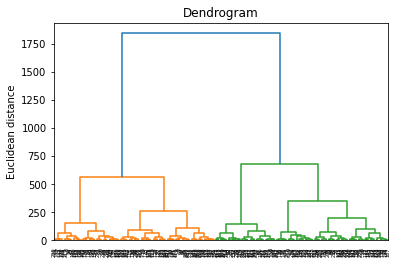

In [37]:
from scipy.cluster.hierarchy import dendrogram , linkage
#Linkage Matrix
Z = linkage(X_train, method = 'ward')
#plotting dendrogram
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()


# PCA

In [38]:

from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [39]:
p_var = pca.explained_variance_ratio_


In [40]:
print(p_var)


[9.90056484e-01 9.01813825e-03 9.17845638e-04 7.50750031e-06
 2.48969700e-08 3.10988492e-33 3.43770089e-36 5.19686022e-37]


In [42]:
for x in p_var:
    print("{:9f}".format(float(x)))

 0.990056
 0.009018
 0.000918
 0.000008
 0.000000
 0.000000
 0.000000
 0.000000


It can be seen that first component is responsible for 98.87% of variance

In [43]:
from sklearn.decomposition import PCA
p = PCA(n_components=1)
X_train = p.fit_transform(X_train)
X_test = p.transform(X_test)


In [44]:
#REBUILDING LINEAR MODEL 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)


LinearRegression()

In [45]:
y_pred = lin_model.predict(X_train)

rmse = (np.sqrt(mean_squared_error(y_train, y_pred)))
print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("\n")

y_pred = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("The model performance for testing set")
print('RMSE is {}'.format(rmse))


The model performance for training set
RMSE is 1445175.7667573392


The model performance for testing set
RMSE is 1414957.9132776093


In [47]:
#KMEANS REBUILD
from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters=5)
y_km5 = kmeans5.fit_predict(X_train)
print(y_km5)


[0 2 2 0 2 2 3 0 4 3 2 1 3 4 4 1 3 3 0 1 2 1 4 2 0 0 4 2 1 1 0 4 0 0 0 3 0
 4 4 4 0 3 2 0 1 3 0 1 4 3 1 4 3 3 1 4 0 0 1 3 1 0 3 0 3 2 0 4 0 0 1 2 1 1
 3 0 2 2 0 4 2 4 4 4 0 0 3 2 2 1 1 1 2 2 0 2 1 2 3 4 0 1 4 3 3 0 4 3 0 4 3
 1 4 2 0 4 2 1 4 3 4 4 2 0 1 4 0 2 1 0 2 2 4 3 0 3 2 2 4 3 2 3 0 1 1 1 3 1
 3 0 3 2 4 1 4 3 1 3 1 2 2 4 2 3 0 2 0 1 4 4 2 0 0 2 4 4 0 2 0 1 0 2 0 0 4
 1 0 4 4 4 4 1 3 3 2 2 2 4 0 3 3 1 3 2 1 1 4 0 2 0 1 4 2 0 4 1 0 0 4 4 1 0
 3 4 1 2 3 4 0 4 4 1 3 1 2 2 3 3 1 1 2 3 2 4 1 2 2 3 1 1 2 2]


In [48]:

kmeans5.cluster_centers_


array([[-125.8939423 ],
       [  74.79985087],
       [ -61.84802581],
       [ 137.88188522],
       [   6.61966558]])

In [49]:
clusters = list(np.arange(1,11))


In [50]:
distortions = []
ARR = range(1,10)
for k in ARR:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)


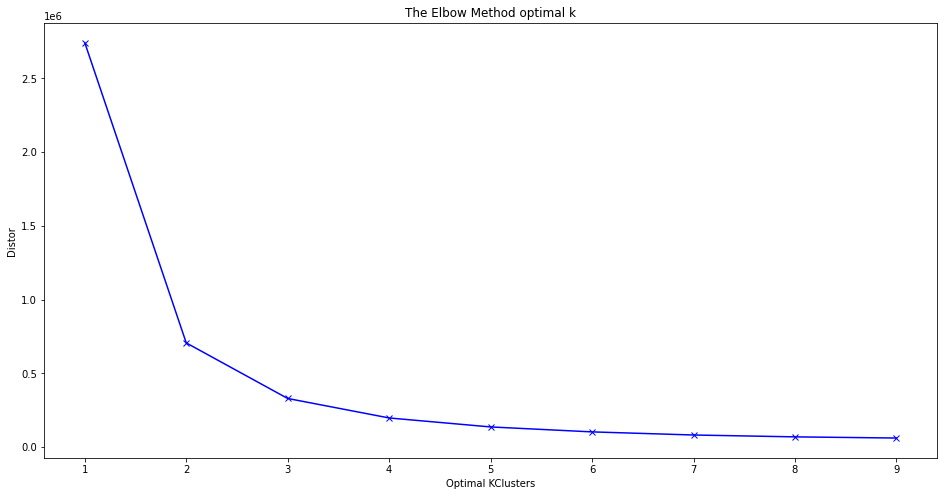

In [52]:
plt.figure(figsize=(16,8))
plt.plot(ARR, distortions, 'bx-')
plt.xlabel('Optimal KClusters')
plt.ylabel('Distor')
plt.title('The Elbow Method optimal k')
plt.show()


In [53]:
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=3)
ykm3 = kmeans3.fit_predict(X)
print(ykm3)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [54]:
kmeans3.cluster_centers_


array([[  6.59047619,  16.22857143,  27.28571429,  27.28571429,
          3.        ,   3.        , 186.        ,   2.53333333],
       [  3.20192308,  14.75961538,  12.35576923,  12.35576923,
          3.00961538,   3.00961538,  81.5       ,   1.40384615],
       [ 10.05660377,  15.49056604,  42.35849057,  42.35849057,
          2.99056604,   2.99056604, 291.5       ,   3.66037736]])

In [55]:
#after pca  AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering


In [56]:
cll = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
#predictinglabels
labels = cll.fit_predict(X_train)


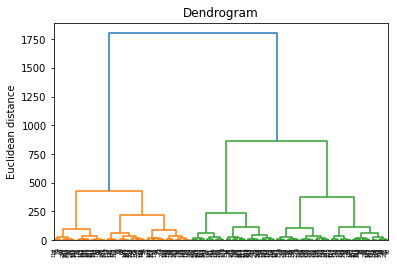

In [57]:
from scipy.cluster.hierarchy import dendrogram , linkage

#Linkage Matrix
a= linkage(X_train, method = 'ward')
#plotting dendrogram
dendro = dendrogram(a)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()
